In [58]:
 #==============FIRSTLY IMPORT ALL THE LIBRARIES====================

import pandas as pd # For data cleaning
import numpy as np # Numerical Methods
from sklearn.metrics import accuracy_score # For Checking Accuracy
from sklearn.model_selection import train_test_split # Splitting Data For Train Test
from sklearn import tree # ML Algo Decision Tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier # ML Algo KNN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB # For Multinomial Naive Bayes Model
from sklearn.model_selection import cross_val_score # For Cross Validation
from sklearn.naive_bayes import BernoulliNB 
import warnings
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings('ignore')


In [54]:
#=========Read the Train Data from Desktop==========================================

train = pd.read_csv("train.csv")
train.head()




,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [43]:
#=========Read the Test Data from Desktop==========================================

test = pd.read_csv('test.csv')
test.head()


,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


In [44]:
#=============================Get the number of rows and columns of test and train ===========================

print(train.shape)
print(test.shape)

(900000, 33)
(700000, 32)


In [45]:
del train['id']
del train['f_27']

# del test['id']
del test['f_27']

In [46]:
# checking the empty values we use
df.isnull().sum()



f_00      0
f_01      0
f_02      0
f_03      0
f_04      0
f_05      0
f_06      0
f_07      0
f_08      0
f_09      0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
target    0
dtype: int64

In [47]:
#handling the problems false prove that there is no empty values in the list
df.isnull().any()


f_00      False
f_01      False
f_02      False
f_03      False
f_04      False
f_05      False
f_06      False
f_07      False
f_08      False
f_09      False
f_10      False
f_11      False
f_12      False
f_13      False
f_14      False
f_15      False
f_16      False
f_17      False
f_18      False
f_19      False
f_20      False
f_21      False
f_22      False
f_23      False
f_24      False
f_25      False
f_26      False
f_27      False
f_28      False
f_29      False
f_30      False
target    False
dtype: bool

In [48]:
# Drop the rows with missing values
df = df.dropna()

In [49]:

# Separating Target & Other Columns
X = train.drop(columns=['target'])
y = train['target']

In [50]:

# Training Testing (Split Data 80% 30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [51]:
#Classifier Naive Bayes classifier for multivariate Bernoulli models
Testing = BernoulliNB() 

#Training by fitting into model by x train and y train
Testing.fit(X_train, y_train)

#prediction the dependent variable
TestingPred = Testing.predict(X_test)

#Checking Accuracy by using naive bayes model
Accuracy = metrics.accuracy_score(y_test, TestingPred) 
print (" Accuracy Using Naive Bayes Model : ", Accuracy)

(' Accuracy Using Naive Bayes Model : ', 0.5810888888888889)


In [52]:
#After executing these Python instructions, we can verify that x_train.shape takes the form of (60000, 784)
#and x_test.shape takes the form of (10000, 784),

print(X_train.shape)

print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(630000, 30)
(270000, 30)
(630000L,)
(270000L,)


In [59]:
#========After finding Accuracy we can find the naive bayes accuracy using laplace  smoothing=================#

#Classifier Naive Bayes classifier for multivariate Bernoulli models
classifier = GaussianNB()

#We have built a GaussianNB classifier. The classifier is trained using training data. We can use fit() method for training it.
classifier.fit(X_train, y_train)

#predict() function enables us to predict the labels of the data values on the basis of the trained model.
y_pred  =  classifier.predict(X_test)

# Checking Accuracy using laplace smoothing
gnbAcc = metrics.accuracy_score(y_test, y_pred) 
print ("Naive Bayes Accuracy using laplace smooting: ", gnbAcc)

('Naive Bayes Accuracy using laplace smooting: ', 0.6253814814814814)


In [55]:
# we can count the datetype

df.get_dtype_counts()

float64    16
int64      15
object      1
dtype: int64

In [61]:
#After doing laplace smoothing we can finding the mean score of naive bayes

clf = BernoulliNB()

#The cross_val_score() function will be used to perform the evaluation, taking the dataset and cross-validation configuration 
#and returning a list of scores calculated for each fold

scores = cross_val_score(clf, X_train, y_train, cv=6)

mean = scores.mean()
print('Mean Score of  Naive Bayes model : ' ,mean)

('Mean Score of  Naive Bayes model : ', 0.5831777714008763)


In [69]:
#cross_val_score() function will be used to perform the evaluation, taking the dataset and cross-validation configuration
#and returning a list of scores calculated for each fold

clf = GaussianNB()
scores = cross_val_score(clf, X_train, y_train, cv=6)
print('Scores of Naive Bayes : ',scores)


('Scores of Naive Bayes : ', array([0.62624165, 0.62591429, 0.62629524, 0.62491429, 0.62641905,
       0.62606311]))


In [64]:
mean = scores.mean()
print('Mean Score Naive Bayes : ',nav_mean)

('Naive Bayes Mean Score: ', 0.6259746028911913)


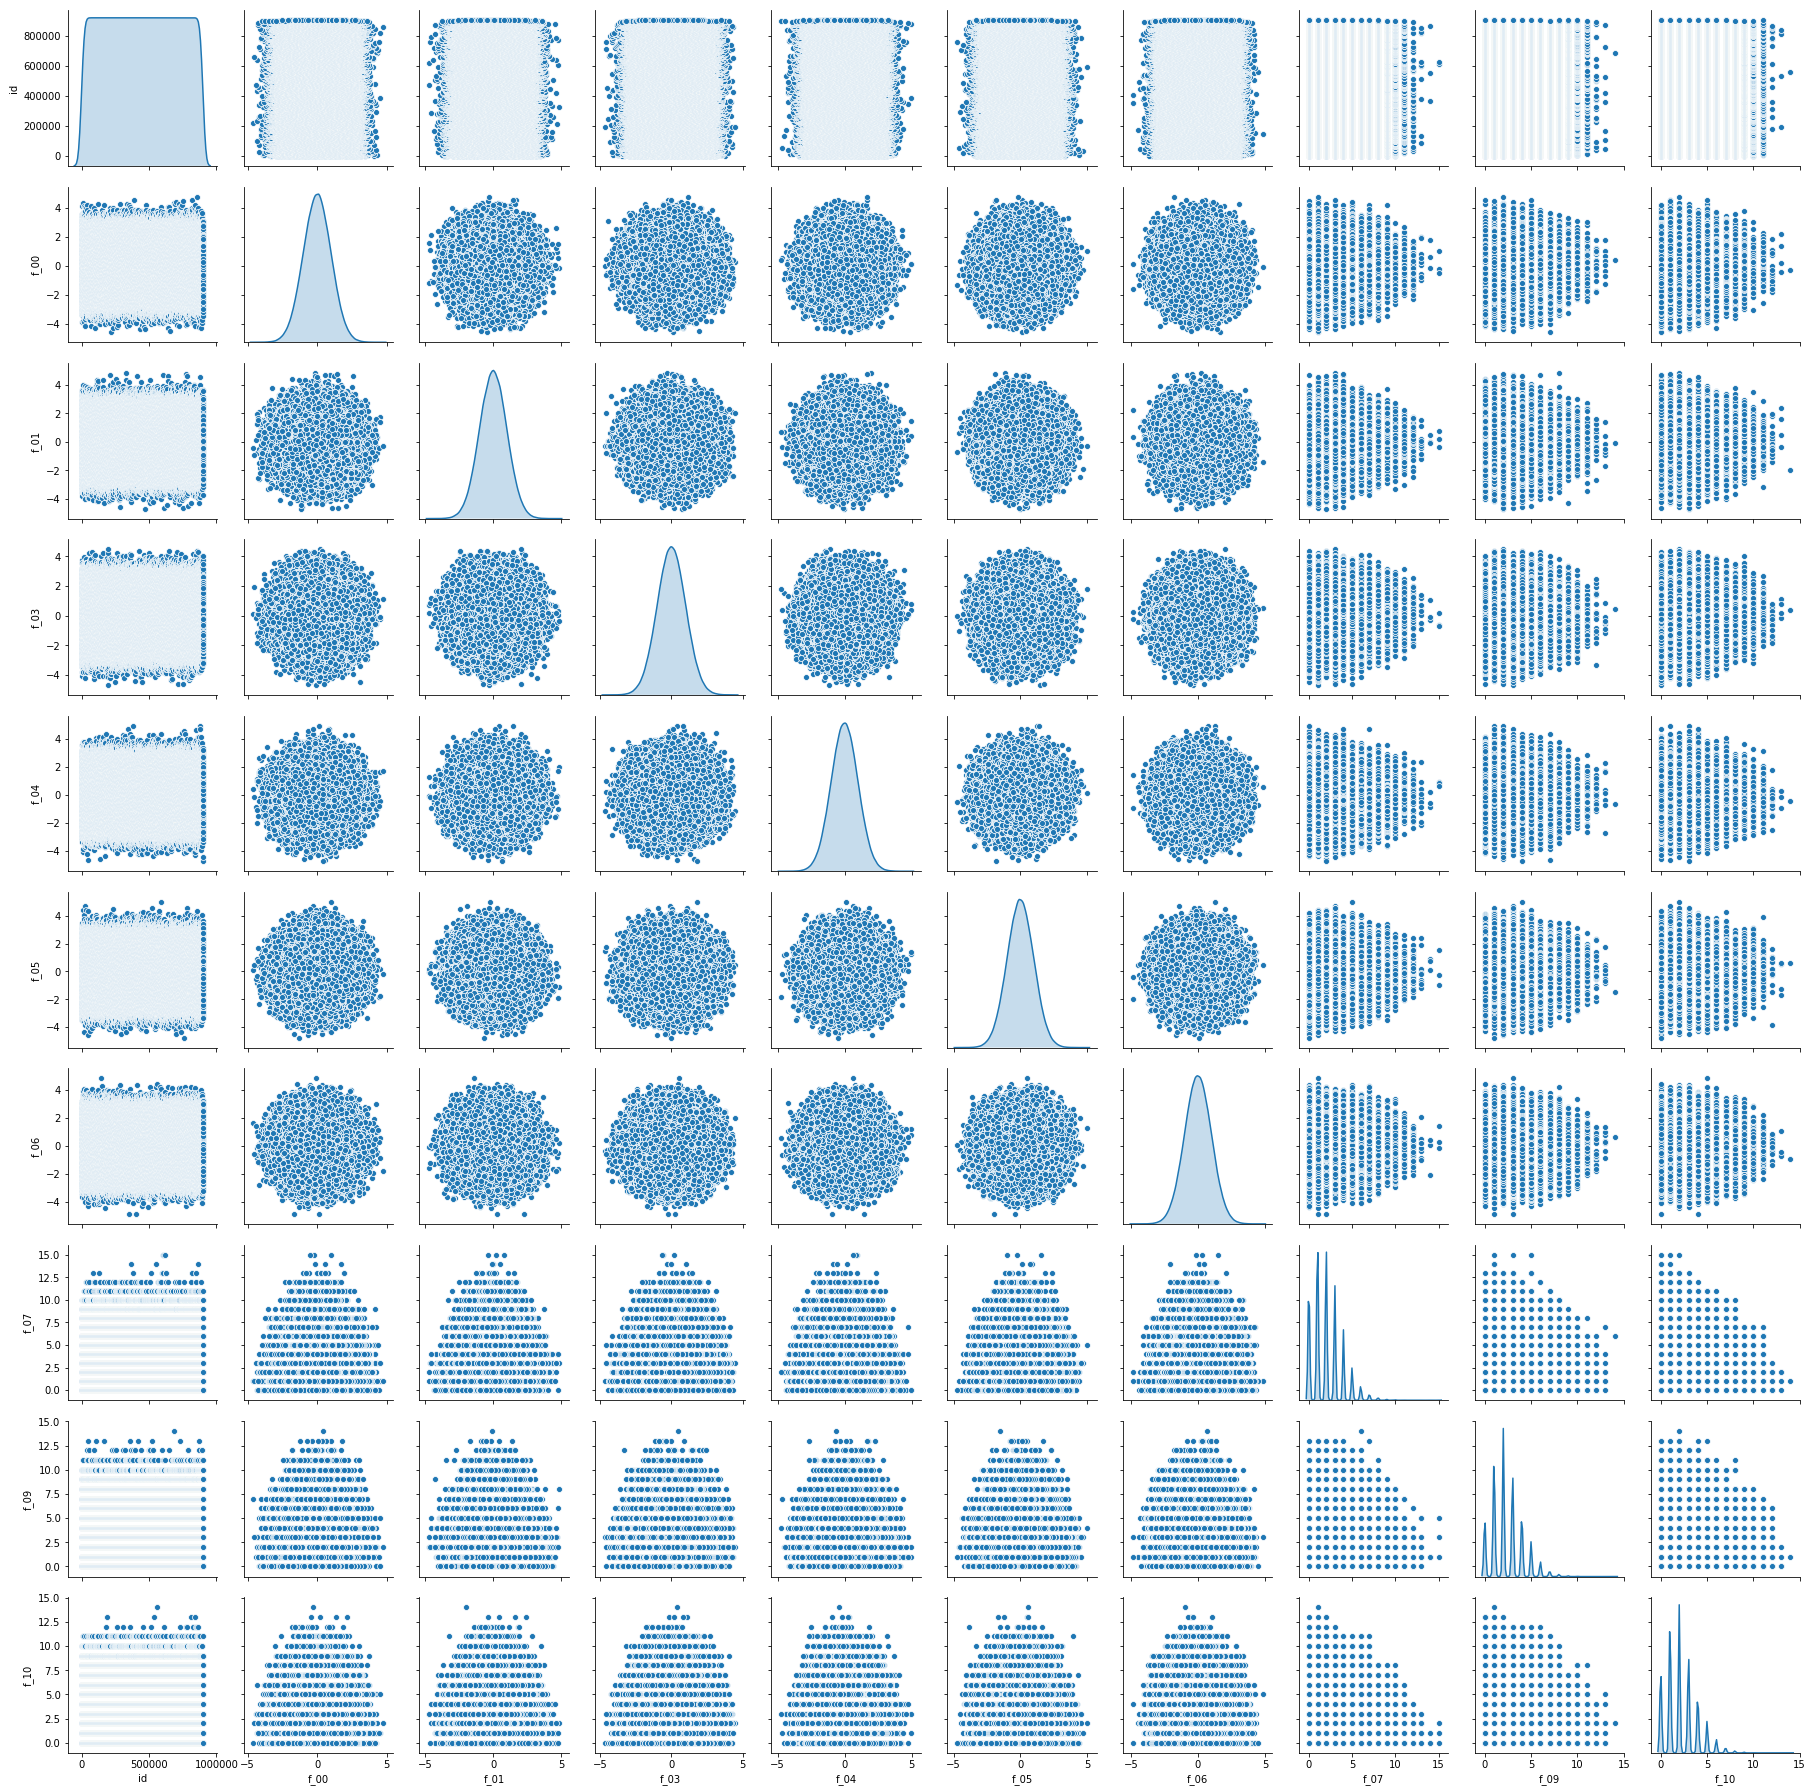

In [68]:
#creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis 
#across a single column.

sns.pairplot(train[['id', 'f_00', 'f_01', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07', 'f_09', 'f_10']], diag_kind="kde")

In [70]:
#in this step the coloumn 27 is droped and after droping  rows will be same

print(train.shape)
print(test.shape)

(900000, 33)
(700000, 31)


In [74]:
#print the id form the test set

testcsv = test[['id']]
testcsv

,id
0,900000
1,900001
2,900002
3,900003
4,900004
5,900005
6,900006
7,900007
8,900008
9,900009


In [76]:
#Print the data of starting 5 ids 
#using set_index() function. This function will take Index column values as a parameter with the method pandas.

pred = test.drop(columns=['id'])
pred.head(5)

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30
0,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,0,...,2.749347,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,99.478419,0,0
1,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,4,...,1.080762,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,-65.993825,1,0
2,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,4,...,-1.406712,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,-87.405622,0,1
3,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,4,...,3.011085,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,-281.293460,0,0
4,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,2,...,0.100594,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,25.629415,0,2


In [77]:
#predict() function enables us to predict the labels of the data values on the basis of the trained model. 
#Syntax: model.predict(data).The predict() function accepts only a single argument which is usually the data to be tested

pred = classifier.predict(pred)
print(pred)
print(len(pred))

[0 1 1 ... 0 0 0]
700000


In [78]:
#print the  staring 5 ids and targets data
testcsv['target'] = pred
testcsv.head()

,id,target
0,900000,0
1,900001,1
2,900002,1
3,900003,0
4,900004,0


In [81]:
#in the end when the all data cleaning process is finished we can download the cleaned csv file and submit 
#it into the kaggle competition

testcsv.shape

#csv file without index
testcsv.to_csv('trainDF.csv', index=False)